In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import cv2
import dlib

In [2]:
BASE_PATH = pathlib.Path('../data/mfr2')
labels_path = BASE_PATH / 'mfr2_labels.txt'
pairs_path = BASE_PATH / 'pairs.txt'

In [3]:
labels=pd.read_csv(filepath_or_buffer=str(labels_path))
labels=labels.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)
people=labels["person"].unique()

def get_indexes(person, mask=True):
    if mask:
        mask_filter = labels["mask"]!="no-mask"
    else:
        mask_filter = labels["mask"]=="no-mask"
    person_filter = labels["person"]==person
    return list(labels[person_filter & mask_filter]["index"])

pairs={person:list(zip(get_indexes(person,mask=True), get_indexes(person, mask=False))) for person in people}

In [4]:
person, (pair1, pair2) = list(pairs.items())[0]

In [23]:
path1 = BASE_PATH / person / f'{person}_{str(pair1[0]).rjust(4, "0")}.png'
path2 = BASE_PATH / person / f'{person}_{str(pair1[1]).rjust(4, "0")}.png'

In [24]:
path1

WindowsPath('../data/mfr2/AdrianDunbar/AdrianDunbar_0001.png')

In [25]:
detector = dlib.get_frontal_face_detector()

In [26]:
img = cv2.imread(str(path1))
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
faces = detector(gray)

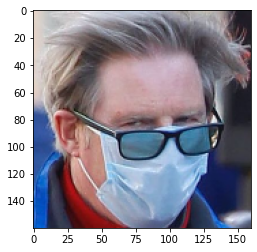

In [27]:
plt.imshow(RGB_im)

In [28]:
img2 = cv2.imread(str(path2))
RGB_im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(src=img2, code=cv2.COLOR_BGR2GRAY)
faces2 = detector(gray2)

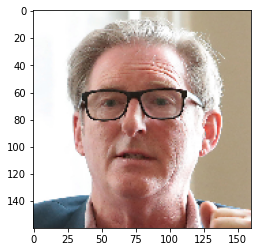

In [29]:
plt.imshow(RGB_im2)

In [30]:
faces, faces2

(rectangles[], rectangles[[(35, 45) (121, 131)]])

In [ ]:
# results = []

# # positive test
# for pair in pairs:
#     (person1,index1),(person2,index2) = pair
#     path1 = BASE_PATH / person1 / f'{person1}_{str(index1).rjust(4, "0")}.png'
#     path2 = BASE_PATH / person2 / f'{person2}_{str(index2).rjust(4, "0")}.png'
    
# #     try:
#     features1,features2=get_embeddings([path1, path2])
#     matched, distance = is_match(features1, features2)
# #     except Exception as e:
# #         print(e)
# #         continue
    
#     results.append([pair, matched, distance])

In [ ]:
TP=len([x for x in results if x[1]]) / len(results)
FN=1-TP

In [ ]:
TP

In [ ]:
FN

In [ ]:
len(list(BASE_PATH.iterdir()))

In [ ]:
# import random
# results_neg = []
# count = 0

# for person1 in BASE_PATH.iterdir():
#     random_people = list(BASE_PATH.iterdir())
#     random.shuffle(random_people)
#     i=0
#     for person2 in random_people:
#         if not person1.is_dir() or not person2.is_dir() or person1.name == person2.name or not person1.name.isalpha() or not person2.name.isalpha():
#             continue
#         count += 1
#         if count >= len(results):
#             break
#         index1 = index2 = 1
        
#         path1 = BASE_PATH / person1.name / f'{person1.name}_{str(index1).rjust(4, "0")}.png'
#         path2 = BASE_PATH / person2.name / f'{person2.name}_{str(index2).rjust(4, "0")}.png'

#         try:
#             features1,features2=get_embeddings([path1, path2])
#             matched, distance = is_match(features1, features2)
#         except Exception as e:
#             print(e)
#             continue

#         results_neg.append([(person1, person2), matched, distance])
#         i+=1
#         if i == 2:
#             break

In [ ]:
FP=len([x for x in results_neg if x[1]]) / len(results_neg)
TN=1-FP

In [ ]:
len(results)

In [ ]:
len(results_neg)

In [ ]:
TP=len([x for x in results if x[1]]) / (len(results) + len(results_neg))
FN=len([x for x in results if not x[1]]) / (len(results) + len(results_neg))
FP=len([x for x in results_neg if x[1]]) / (len(results) + len(results_neg))
TN=len([x for x in results_neg if not x[1]]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
from sklearn import svm
X = [x[2] for x in results] + [x[2] for x in results_neg]
y = [1 for x in results] + [0 for x in results_neg]
clf = svm.SVC() #kernel="linear")
clf.fit(np.array(X).reshape(-1, 1), y)

In [ ]:
ps=clf.predict(np.array([x[2] for x in results]).reshape(-1, 1))

In [ ]:
len([x for x in ps if x == 1])

In [ ]:
ns=clf.predict(np.array([x[2] for x in results_neg]).reshape(-1, 1))

In [ ]:
np.array([x[2] for x in results + results_neg])

In [ ]:
len([x for x in ps if x == 0])

In [ ]:
len(ps)

In [ ]:
TP=len([x for x in ps if x]) / (len(results) + len(results_neg))
FN=len([x for x in ps if not x]) / (len(results) + len(results_neg))
FP=len([x for x in ns if x]) / (len(results) + len(results_neg))
TN=len([x for x in ns if not x]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
TP

In [ ]:
FN

In [ ]:
FP

In [ ]:
len(results) + len(results_neg)

In [ ]:
[(0.59+x/1000,clf.predict(np.array(0.59+x/1000).reshape(-1, 1))) for x in range(10)]

In [ ]:
import seaborn as sns
total_results = pd.DataFrame(data=[(x[2],"positive") for x in results]+[(x[2],"negative") for x in results_neg], columns=["distance", "type"])

In [ ]:
sns.histplot(total_results, x='distance', hue='type', element='step', kde=True, stat='percent')